In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
data_1 = "data_rec/data_points_normal.csv"
data_2 = "data_rec/data_points_anormal.csv"
df_1 = pd.read_csv(data_1)
df_2 = pd.read_csv(data_2)
df_1.head()

,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,p4_x,p4_y,p5_x,p5_y,p6_x,p6_y,p7_x,p7_y,time
0,314.0,224.0,246.0,230.0,222.0,323.0,234.0,357.0,382.0,219.0,415.0,329.0,382.0,368.0,3.917
1,317.0,224.0,246.0,232.0,225.0,323.0,231.0,357.0,382.0,222.0,418.0,329.0,382.0,368.0,4.179
2,317.0,224.0,246.0,232.0,225.0,323.0,234.0,360.0,379.0,222.0,418.0,329.0,382.0,368.0,4.458
3,317.0,224.0,246.0,232.0,225.0,321.0,231.0,355.0,379.0,219.0,418.0,329.0,379.0,368.0,4.901
4,317.0,224.0,246.0,235.0,225.0,326.0,231.0,360.0,382.0,222.0,418.0,329.0,382.0,368.0,5.131


In [37]:
df_2.head()

,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,p4_x,p4_y,p5_x,p5_y,p6_x,p6_y,p7_x,p7_y,time
0,326.0,219.0,264.0,227.0,231.0,308.0,222.0,347.0,391.0,219.0,424.0,323.0,382.0,363.0,3.928
1,326.0,219.0,264.0,230.0,231.0,308.0,222.0,355.0,391.0,222.0,421.0,326.0,385.0,363.0,4.383
2,326.0,222.0,264.0,230.0,234.0,310.0,225.0,357.0,391.0,224.0,421.0,329.0,379.0,363.0,4.655
3,326.0,222.0,261.0,232.0,237.0,313.0,228.0,352.0,391.0,224.0,418.0,326.0,382.0,363.0,4.918
4,326.0,222.0,261.0,235.0,240.0,321.0,231.0,357.0,391.0,224.0,415.0,329.0,382.0,363.0,5.159


In [3]:
#distance_normal
ds_1  = np.array([])
co=0
for k in range(len(df_1.columns)-8):
    d_column = np.array([])
    ds_col = np.array([])
    for j in range(len(df_1)):
        if j>=(len(df_1)-1):
            break
        co=k*2
        d_column = np.sqrt((df_1.iloc[j+1,co+1]-df_1.iloc[j,co+1])**2+(df_1.iloc[j+1,co]-df_1.iloc[j,co])**2)
        ds_col = np.append(ds_col.reshape(-1,1),d_column.reshape(-1,1),axis=0)
    print(ds_col.shape)
    ds_1 = np.append(ds_1.reshape(len(ds_col),-1),ds_col.reshape(len(ds_col),1),axis=1)     

(489, 1)
(489, 1)
(489, 1)
(489, 1)
(489, 1)
(489, 1)
(489, 1)


In [4]:
#distance_anormal
ds_2  = np.array([])
co=0
for k in range(len(df_2.columns)-8):
    d_column = np.array([])
    ds_col = np.array([])
    for j in range(len(df_2)):
        if j>=(len(df_2)-1):
            break
        co=k*2
        d_column = np.sqrt((df_2.iloc[j+1,co+1]-df_2.iloc[j,co+1])**2+(df_2.iloc[j+1,co]-df_2.iloc[j,co])**2)
        ds_col = np.append(ds_col.reshape(-1,1),d_column.reshape(-1,1),axis=0)
    print(ds_col.shape)
    ds_2 = np.append(ds_2.reshape(len(ds_col),-1),ds_col.reshape(len(ds_col),1),axis=1)     

(488, 1)
(488, 1)
(488, 1)
(488, 1)
(488, 1)
(488, 1)
(488, 1)


In [55]:
pd.DataFrame(data = ds).head()


,0,1,2,3,4,5,6
0,0.0,3.000000,0.000000,8.000000,3.0,4.242641,3.0
1,3.0,0.000000,3.605551,3.605551,2.0,3.000000,6.0
2,0.0,3.605551,4.242641,5.830952,0.0,4.242641,3.0
3,0.0,3.000000,8.544004,5.830952,0.0,4.242641,0.0
4,0.0,0.000000,3.000000,6.708204,0.0,10.295630,3.0


In [17]:
print(len(ds))

488


In [5]:
#derivative od distance_normal
t   = df_1.loc[:,['time']].values
ds_d_1= np.array([])
for k in range(ds_1.shape[1]):
    ds_col = np.array([])
    ds_dr  = np.array([])
    for j in range(len(t)):
        if j>=(len(t)-2):
            break
        
        if (t[j+1]-t[j])==0:
            ds_dr=np.array([0])
        else:
            ds_dr  = ((ds_1[j+1,k]-ds_1[j,k])/(t[j+1]-t[j]))
        ds_col = np.append(ds_col.reshape(-1,1),ds_dr.reshape(-1,1),axis=0)  
    print(ds_col.shape)
    ds_d_1 = np.append(ds_d_1.reshape(len(ds_col),-1),ds_col.reshape(len(ds_col),1),axis=1)     

(488, 1)
(488, 1)
(488, 1)
(488, 1)
(488, 1)
(488, 1)
(488, 1)


In [6]:
t   = df_2.loc[:,['time']].values
ds_d_2= np.array([])
for k in range(ds_2.shape[1]):
    ds_col = np.array([])
    ds_dr  = np.array([])
    for j in range(len(t)):
        if j>=(len(t)-3):
            break
        
        if (t[j+1]-t[j])==0:
            ds_dr=np.array([0])
        else:
            ds_dr  = ((ds_2[j+1,k]-ds_2[j,k])/(t[j+1]-t[j]))
        ds_col = np.append(ds_col.reshape(-1,1),ds_dr.reshape(-1,1),axis=0)  
    print(ds_col.shape)
    ds_d_2 = np.append(ds_d_2.reshape(len(ds_col),-1),ds_col.reshape(len(ds_col),1),axis=1)     

(486, 1)
(486, 1)
(486, 1)
(486, 1)
(486, 1)
(486, 1)
(486, 1)


In [7]:
#finalDf = pd.concat([ds_d1,ds_d2 ,ds_d3,ds_d4,ds_d5,ds_d6,ds_d7,t] ,axis = 1)
#finalDf.head(5)
#dt= np.concatenate((ds_d,t), axis=1)
ds_d_1=np.delete(ds_d_1, 487,0)
ds_d_1=np.delete(ds_d_1, 486,0)
print(ds_d_1.shape)
#
print(ds_d_2.shape)
t=np.delete(t, 488,0)
t=np.delete(t, 487,0)
t=np.delete(t, 486,0)
print(t.shape)

(486, 7)
(486, 7)
(486, 1)


In [8]:
#col_mean = np.nanmean(dt, axis=0)
#print(col_mean)
#inds = np.where(np.isnan(dt))
#idx=np.where(np.isnan(dt))
#Place column means in the indices. Align the arrays using take
ds_d_1[~np.isfinite(ds_d_1)] = 0
ds_d_2[~np.isfinite(ds_d_2)] = 0

In [63]:
print(np.any(np.isfinite(dt)))

True


In [9]:
pca = PCA(n_components=1)
nr=pca.fit_transform(ds_d_1)
anor=pca.fit_transform(ds_d_2)

In [11]:
pDf_nor = pd.DataFrame(data = nr
             , columns = ['pca_normal'])
pDf_anor = pd.DataFrame(data = anor
             , columns = ['pca_anormal'])
#data normalization

pDf_nor.loc[:,['pca_normal']] = StandardScaler().fit_transform(pDf_nor.loc[:,['pca_normal']].values)
pDf_anor.loc[:,['pca_anormal']] = StandardScaler().fit_transform(pDf_anor.loc[:,['pca_anormal']].values)
pDf_nor.head()

,pca_normal
0,-0.017072
1,0.087162
2,-0.001934
3,-0.001820
4,-0.001652


In [17]:
print(pDf_nor.loc[:,['pca_normal']].var())
print(pDf_anor.loc[:,['pca_anormal']].var())

pca_normal    1.002062
dtype: float64
pca_anormal    1.002062
dtype: float64


In [13]:
finalDf = pd.concat([pDf_nor,pDf_anor ,df_1[['time']]], axis = 1)
cov_Df = pd.concat([pDf_nor,pDf_anor ], axis = 1)
cov_Df.cov()

,pca_normal,pca_anormal
pca_normal,1.002062,-0.009083
pca_anormal,-0.009083,1.002062


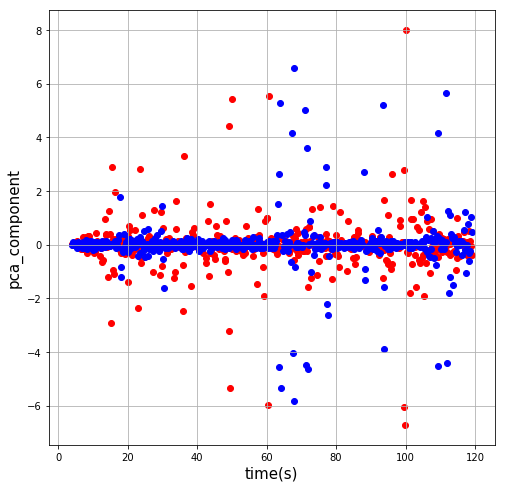

In [15]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('time(s)', fontsize = 15)
ax.set_ylabel('pca_component', fontsize = 15)
#ax.set_title('2 Component PCA', fontsize = 20)


ax.scatter(finalDf[['time']]
             , finalDf[['pca_anormal']],c='r')
ax.scatter(finalDf[['time']]
             , finalDf[['pca_normal']],c='b')

#ax.legend(targets)
ax.grid()

In [107]:
finalDf.to_csv ('data_rec/final_data.csv', index = None, header=True)

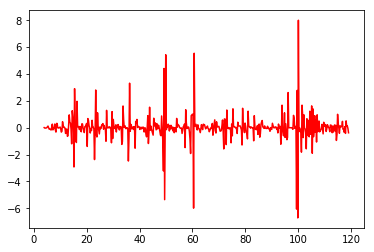

In [108]:
plt.plot(finalDf[['time']]
             , finalDf[['pca_anormal']],c='r')
plt.show()

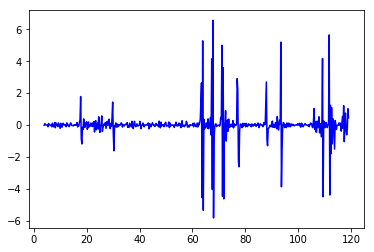

In [110]:
plt.plot(finalDf[['time']]
             , finalDf[['pca_normal']],c='b')
plt.show()

/home/boukbab/anaconda2/envs/ws_pose/lib/python3.5/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


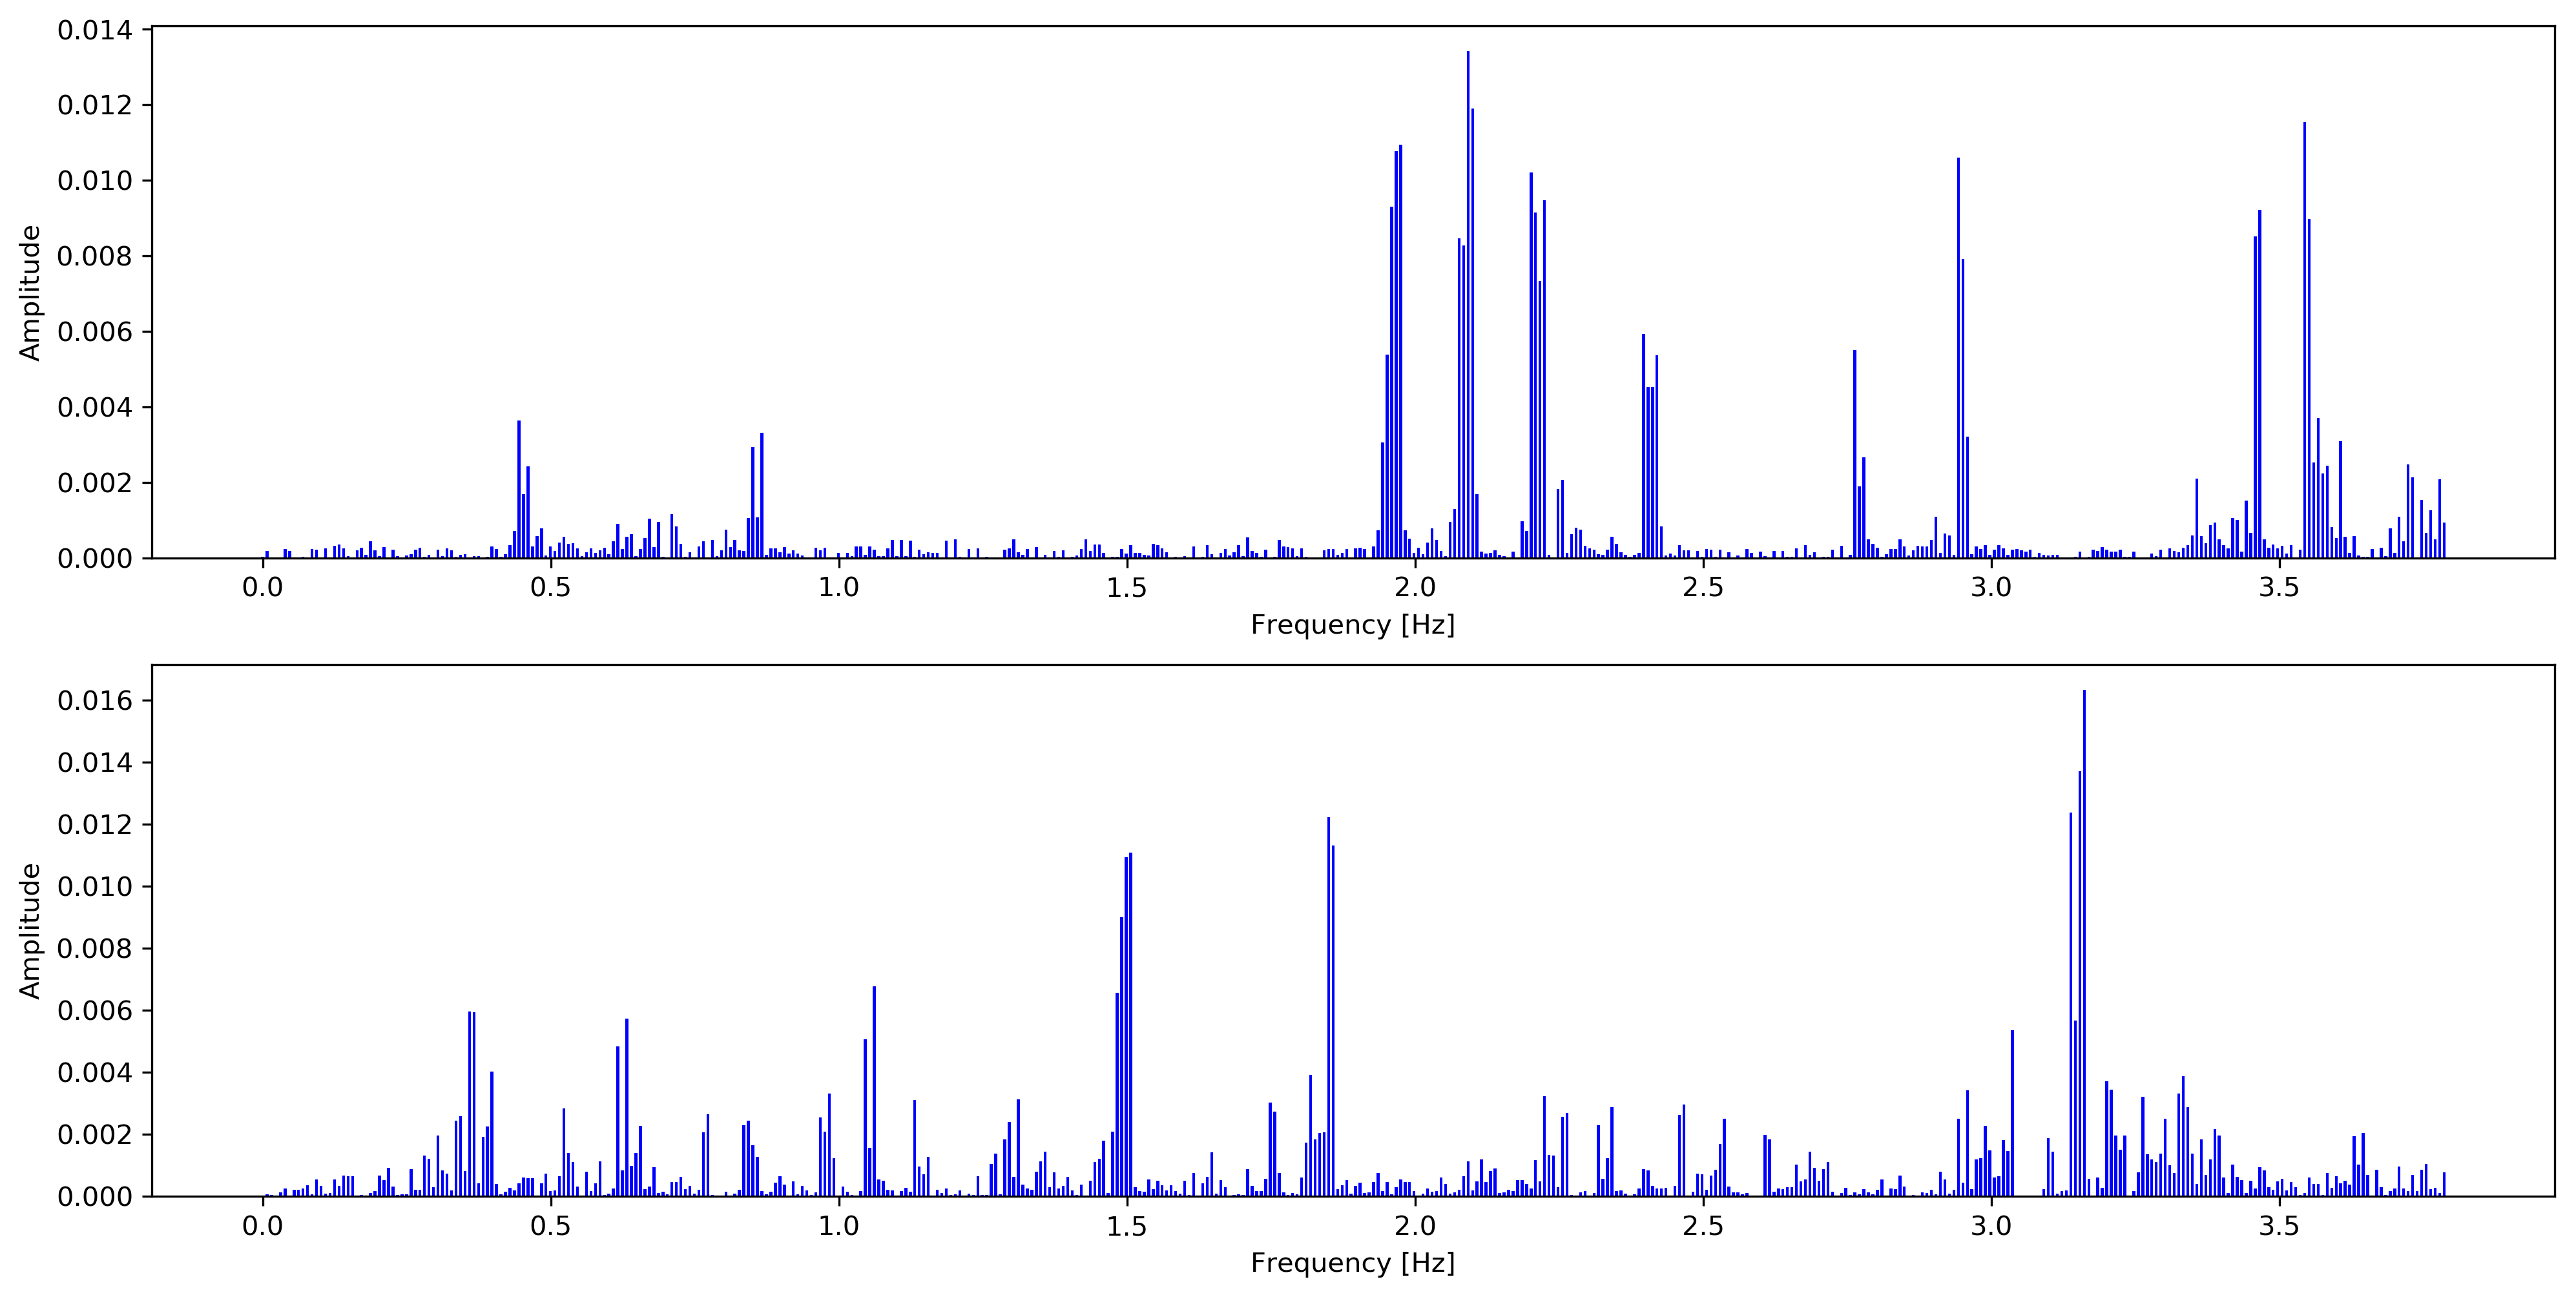

In [84]:
fft_nor = np.fft.fft(finalDf[['pca_normal']])
fft_anor = np.fft.fft(finalDf[['pca_anormal']])
T = finalDf[['time']].iloc[1] - finalDf[['time']].iloc[0]  # sampling interval 
N = len(finalDf[['pca_normal']])

# 1/T = frequency

f = np.linspace(0, 1 / T, N)
x=f
y_nor=np.abs(fft_nor)* 1 / N # 1 / N is a normalization factor
y_anor=np.abs(fft_anor)* 1 / N#[:N // 2]
freq = pd.DataFrame(data = x
             , columns = ['Frequency [Hz]'])
ampl_nor=  pd.DataFrame(data = y_nor
             , columns = ['Amplitude'])
ampl_anor=  pd.DataFrame(data = y_anor
             , columns = ['Amplitude'])
#ampl_nor.loc[:,['Amplitude']] = StandardScaler().fit_transform(ampl_nor.loc[:,['Amplitude']].values)
#ampl_anor.loc[:,['Amplitude']] = StandardScaler().fit_transform(ampl_anor.loc[:,['Amplitude']].values)
#spect= pd.concat([freq,ampl], axis = 1)
#print(len(spect))
#spect.to_csv ('data_rec/spect_anor.csv', index = None, header=True)
#spect['Amplitude'] = pd.to_numeric(spect['Amplitude'])
#spect['Frequency [Hz]'] = pd.to_numeric(spect['Frequency [Hz]'])
#,figsize=(16,4), dpi=300
fig, (ax1, ax2) = plt.subplots(2,figsize = (16,8),dpi=300)

ax1.set_ylabel("Amplitude")
ax1.set_xlabel("Frequency [Hz]")
ax1.bar(freq['Frequency [Hz]'],ampl_nor['Amplitude'], color='b', width=0.005, align='center')  

ax2.set_ylabel("Amplitude")
ax2.set_xlabel("Frequency [Hz]")
ax2.bar(freq['Frequency [Hz]'],ampl_anor['Amplitude'], color='b', width=0.005, align='center') 